In [1]:
%matplotlib inline
import pandas as pd
import os
import matplotlib as plt
import seaborn as sns
import numpy as np

C:\Anaconda3\lib\site-packages\matplotlib\__init__.py:872: UserWarning: axes.color_cycle is deprecated and replaced with axes.prop_cycle; please use the latter.
  warnings.warn(self.msg_depr % (key, alt_key))


In [137]:
#custom style HTML output

from IPython.core.display import HTML

csspath1 = r'C:\COURSERA\PYCON2015_TUTORIALS\Brandon Rhodes - Pandas From The Ground Up - PyCon 2015\style-table.css'
csspath2 = r'C:\COURSERA\PYCON2015_TUTORIALS\Brandon Rhodes - Pandas From The Ground Up - PyCon 2015\style-notebook.css'

css = open(csspath1).read() + open(csspath2).read()
HTML('<style>{}</style>'.format(css))

In [2]:
# Read in data

IBM = pd.read_csv('DATA\IBMStock.csv')
GE = pd.read_csv('DATA\GEStock.csv')
ProcterGamble = pd.read_csv('DATA\ProcterGambleStock.csv')
CocaCola = pd.read_csv('DATA\CocaColaStock.csv')
Boeing = pd.read_csv('DATA\BoeingStock.csv')

# Convert Date variable to datetime type in all dataframes
# This is necessary to answer the following questions more easily

dataframes = (IBM,GE,ProcterGamble,CocaCola,Boeing)

for dataframe in dataframes:    
    dataframe.Date = pd.to_datetime(pd.Series(dataframe.Date))

In [3]:
type(IBM)

pandas.core.frame.DataFrame

In [4]:
# How many observations are there in each data set?

dataframes = (IBM,GE,ProcterGamble,CocaCola,Boeing)

for dataframe in dataframes:
    print(len(dataframe))

480
480
480
480
480


In [6]:
# What is the earliest year in our datasets?

for dataframe in dataframes:
    print(dataframe.Date.dt.year.min())

1970
1970
1970
1970
1970


In [7]:
# What is the latest year in our datasets?

for dataframe in dataframes:
    print(dataframe.Date.dt.year.max())

2009
2009
2009
2009
2009


In [8]:
# What is the mean stock price of IBM over this time period?

IBM.StockPrice.mean()

144.3750303076664

In [9]:
# What is the minimum stock price of General Electric (GE) over this time period?

GE.StockPrice.min()

9.2936363639999993

In [10]:
# What is the maximum stock price of Coca-Cola over this time period?

CocaCola.StockPrice.max()

146.58428569999998

In [11]:
# What is the median stock price of Boeing over this time period?

Boeing.StockPrice.median()

44.88339827

In [12]:
# What is the standard deviation of the stock price of Procter & Gamble over this time period?

ProcterGamble.StockPrice.std()

18.19414030797156

In [14]:
CocaCola.head()

,Date,StockPrice
0,1970-01-01,83.368095
1,1970-02-01,81.591053
2,1970-03-01,81.338095
3,1970-04-01,76.805909
4,1970-05-01,69.278571


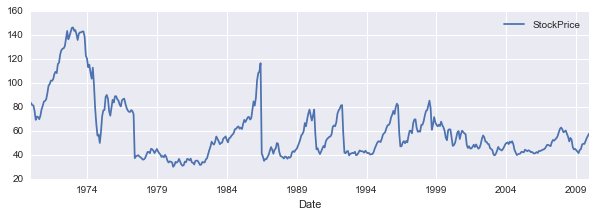

In [16]:
# Around what year did Coca-Cola has its highest stock price in this time period?
# Around what year did Coca-Cola has its lowest stock price in this time period?

CocaCola.plot( x='Date' , y='StockPrice' , figsize=(10,3) )

In [7]:
# Let's take a look at how the stock prices changed from 1995-2005 for all five companies.

series = [IBM,GE.StockPrice,ProcterGamble.StockPrice,CocaCola.StockPrice,Boeing.StockPrice]

allstocks = pd.concat(series, axis=1)
allstocks.columns = ['Date','IBM','GE','ProcterGamble','CocaCola','Boeing']
allstocks.set_index('Date',inplace=True)
allstocks.head(1)

,IBM,GE,ProcterGamble,CocaCola,Boeing
Date,,,,,
1970-01-01,360.319048,74.253333,111.874286,83.368095,27.85381


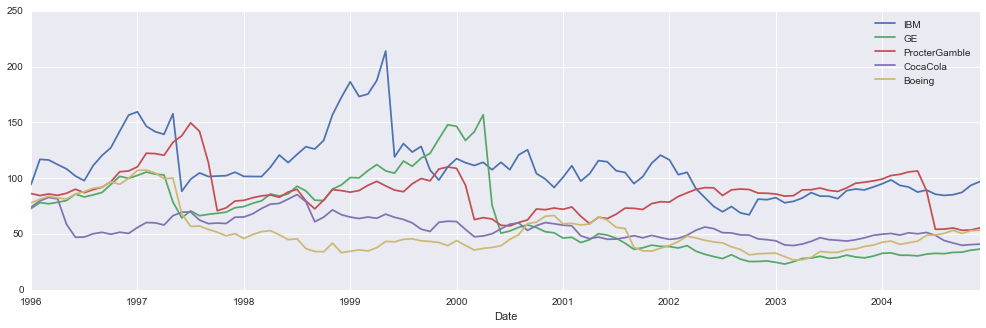

In [192]:
allstocks[(allstocks.index.year > 1995) & (allstocks.index.year < 2005)].plot(figsize=[17,5])

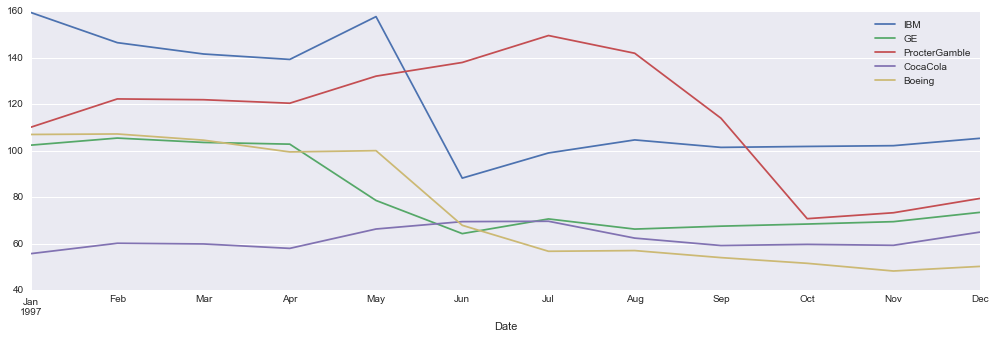

In [166]:
# In October of 1997, there was a global stock market crash 
# that was caused by an economic crisis in Asia. Comparing 
# September 1997 to November 1997, which companies saw a 
# decreasing trend in their stock price?

allstocks[allstocks.index.year == 1997].plot(figsize=[17,5])

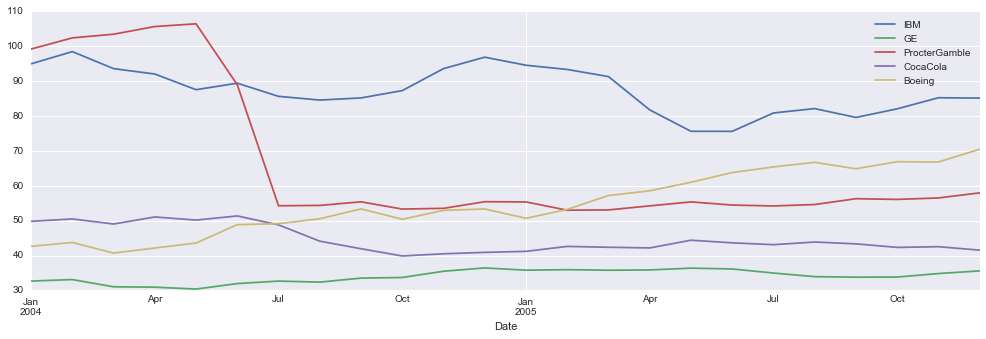

In [169]:
# In the last two years of this time period (2004 and 2005) 
# which stock seems to be performing the best, in terms of 
# increasing stock price?

allstocks[(allstocks.index.year >= 2004) & (allstocks.index.year <= 2005)].plot(figsize=[17,5])

In [195]:
# For IBM, compare the monthly averages to the overall average stock price. 
# In which months has IBM historically had a higher stock price (on average)?

allstocks.groupby(allstocks.index.month).IBM.mean() > allstocks.IBM.mean()

1      True
2      True
3      True
4      True
5      True
6     False
7     False
8     False
9     False
10    False
11    False
12    False
Name: IBM, dtype: bool

In [18]:
# General Electric and Coca-Cola both have their highest average 
# stock price in the same month. Which month is this?

allstocks.groupby(allstocks.index.month).mean()[['GE','CocaCola']]

,GE,CocaCola
1,62.045106,60.368487
2,62.520805,60.734754
3,63.150548,62.071354
4,64.480092,62.688882
5,60.871351,61.443581
6,56.468439,60.812084
7,56.733493,58.983460
8,56.503149,58.880139
9,56.239131,57.600238
10,56.238968,57.938868


In [15]:
# For the months of December and January, every company's
# average stock is higher in one month and lower in 
# the other. In which month are the stock prices lower?

allstocks.groupby(allstocks.index.month).mean().loc[[1,12]]

,IBM,GE,ProcterGamble,CocaCola,Boeing
1,150.238423,62.045106,79.617984,60.368487,46.510974
12,140.759310,59.102174,78.296608,59.732227,46.173146
